In [193]:
#import need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [194]:
data_climate = pd.read_csv('data_fortaleza-CE.csv')
data_climate.head()

codigo_estacao        data  hora  temp_inst  temp_max  temp_min  umid_inst  \
0           A305  12/05/2019    13       30.4      30.4      29.0         67   
1           A305  12/05/2019    11       28.4       NaN       NaN         76   
2           A305  12/05/2019    14       30.9      31.0      29.6         58   
3           A305  12/05/2019    12       29.0      29.7      28.3         72   
4           A305  12/05/2019    15       32.1      32.3      30.9         55   

   umid_max  umid_min  pto_orvalho_inst  pto_orvalho_max  pto_orvalho_min  \
0      73.0      64.0              23.5             24.1             22.2   
1       NaN       NaN              23.7              NaN              NaN   
2      67.0      58.0              21.7             23.4             21.7   
3      76.0      68.0              23.5             24.3             22.8   
4      60.0      53.0              22.1             23.4             21.2   

   pressao  pressao_max  pressao_min  vento_direcao  vento_vel   vento_rajada  \
0   1009.7       1010.1       1009.7            2.9        140            7.6   
1   1009.6          NaN          NaN            2.3        152            NaN   
2   1009.1       1009.7       1009.1            3.0        139            8.3   
3   1010.0       1010.0       1009.6            2.8        137            6.7   
4   1008.3       1009.1       1008.2            2.8        148            8.2   

   radiacao  precipitacao  
0    1524.0           0.6  
1     171.6           0.0  
2    1643.0           0.0  
3    1319.0           0.0  
4    2150.0           0.0

In [195]:
#Correting column's names
data_climate.columns = ['codigo_estacao','data','hora','temp_inst','temp_max','temp_min','umid_inst','umid_max','umid_min','pto_orvalho_inst','pto_orvalho_max','pto_orvalho_min','pressao','pressao_max','pressao_min','vento_direcao','vento_vel','vento_rajada','radiacao','precipitacao']
data_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 20 columns):
codigo_estacao      1905 non-null object
data                1905 non-null object
hora                1905 non-null int64
temp_inst           1905 non-null float64
temp_max            1904 non-null float64
temp_min            1904 non-null float64
umid_inst           1905 non-null int64
umid_max            1904 non-null float64
umid_min            1904 non-null float64
pto_orvalho_inst    1905 non-null float64
pto_orvalho_max     1904 non-null float64
pto_orvalho_min     1904 non-null float64
pressao             1905 non-null float64
pressao_max         1904 non-null float64
pressao_min         1904 non-null float64
vento_direcao       1905 non-null float64
vento_vel           1905 non-null int64
vento_rajada        1904 non-null float64
radiacao            1905 non-null float64
precipitacao        1905 non-null float64
dtypes: float64(15), int64(3), object(2)
memory usage: 297.8+

0       1.4
1       NaN
2       1.4
3       1.4
4       1.4
       ... 
1900    0.8
1901    1.7
1902    0.4
1903    0.7
1904    0.4
Length: 1905, dtype: float64


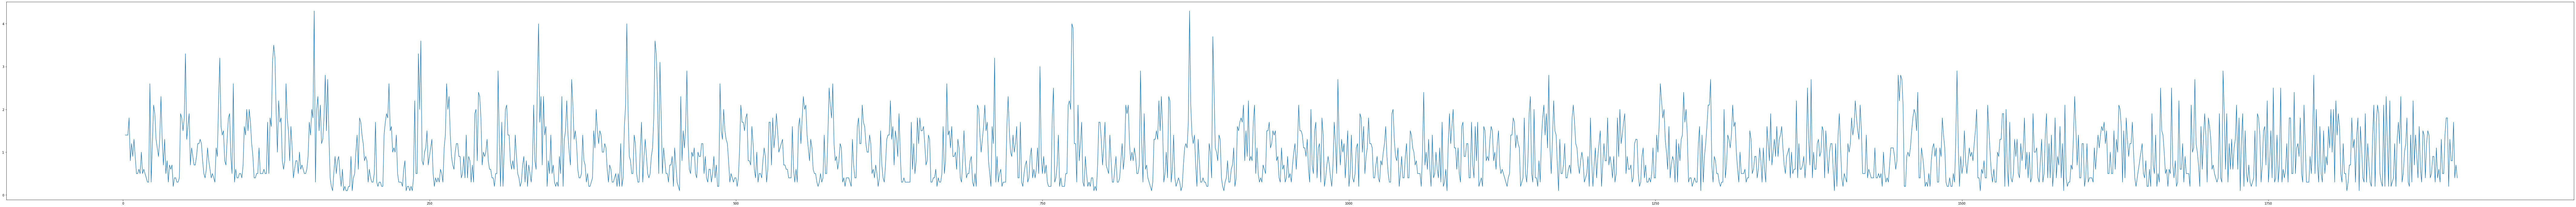

In [196]:
# dif into temp_max and temp_min
diff_temp = data_climate.temp_max - data_climate.temp_min
plt.rcParams['figure.figsize'] = (152,12)
plt.plot(diff_temp)
print(diff_temp)

0       9.0
1       NaN
2       9.0
3       8.0
4       7.0
       ... 
1900    8.0
1901    8.0
1902    2.0
1903    4.0
1904    2.0
Length: 1905, dtype: float64


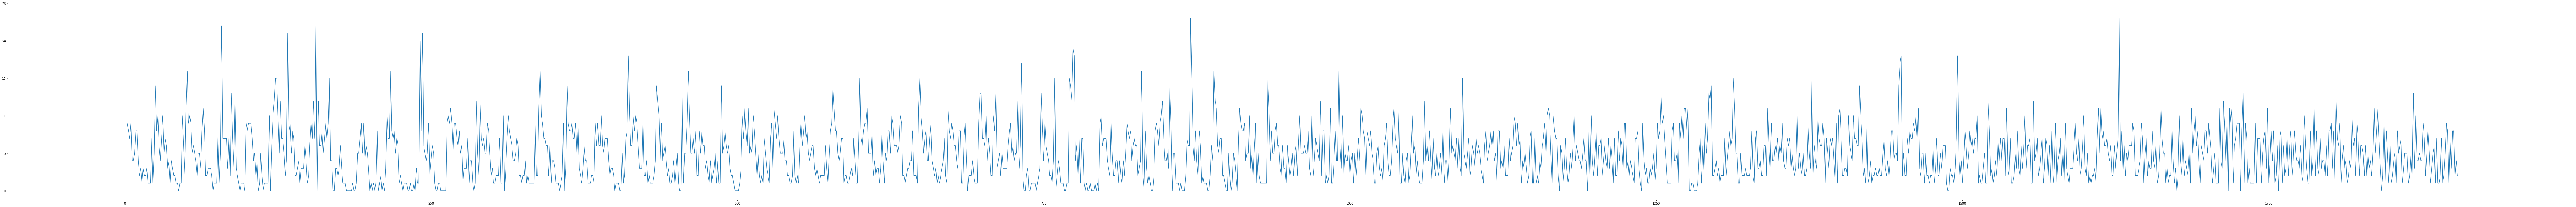

In [197]:
# diff between umid_max umid_min
diff_umid = data_climate.umid_max - data_climate.umid_min
print(diff_umid)
plt.plot(diff_umid)

0       1.9
1       NaN
2       1.7
3       1.5
4       2.2
       ... 
1900    0.8
1901    0.6
1902    0.8
1903    1.2
1904    0.6
Length: 1905, dtype: float64


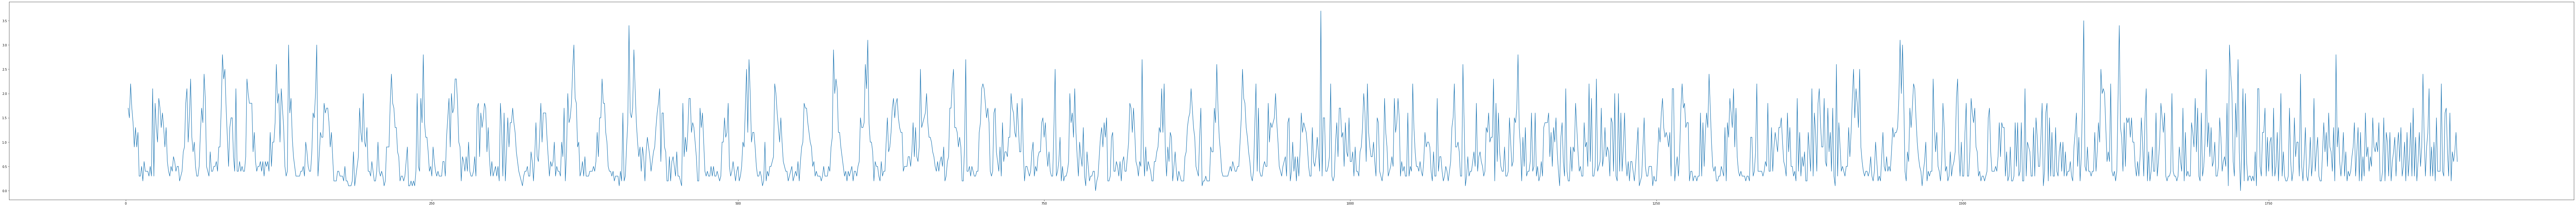

In [198]:
# diff betwenn dew_max and dew_min
diff_dew = data_climate.pto_orvalho_max - data_climate.pto_orvalho_min
print(diff_dew)
plt.plot(diff_dew)

0       0.4
1       NaN
2       0.6
3       0.4
4       0.9
       ... 
1900    0.8
1901    0.9
1902    0.3
1903    0.8
1904    0.7
Length: 1905, dtype: float64


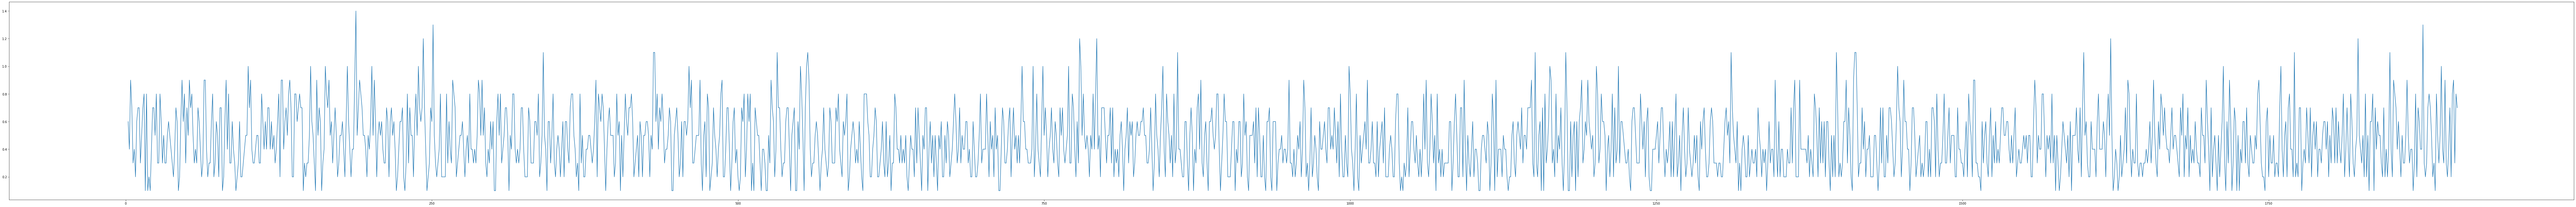

In [199]:
#diff between pressue_max and pressure_min
diff_pressure = data_climate.pressao_max - data_climate.pressao_min
print(diff_pressure)
plt.plot(diff_pressure)

0       4.7
1       NaN
2       5.3
3       3.9
4       5.4
       ... 
1900    4.9
1901    5.9
1902    3.8
1903    5.5
1904    3.4
Length: 1905, dtype: float64


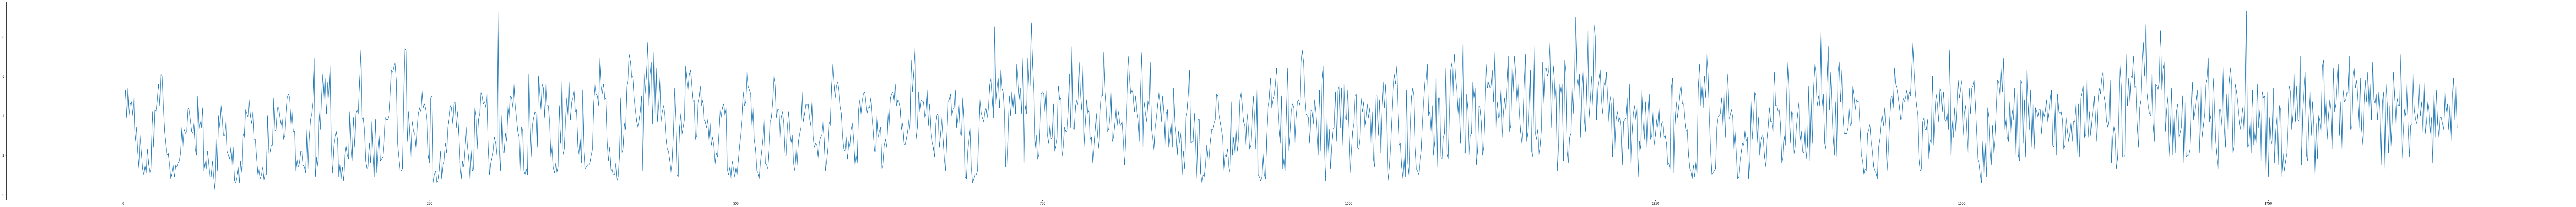

In [200]:
# diff between wind_direction and wind_guest
diff_wind = data_climate.vento_rajada - data_climate.vento_direcao
print(diff_wind)
plt.plot(diff_wind)

In [201]:
new_dataset = pd.DataFrame(data_climate[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','radiacao','precipitacao','vento_vel']])
new_dataset.head()

hora  temp_inst  umid_inst  pto_orvalho_inst  pressao  vento_rajada  \
0    13       30.4         67              23.5   1009.7           7.6   
1    11       28.4         76              23.7   1009.6           NaN   
2    14       30.9         58              21.7   1009.1           8.3   
3    12       29.0         72              23.5   1010.0           6.7   
4    15       32.1         55              22.1   1008.3           8.2   

   radiacao  precipitacao  vento_vel  
0    1524.0           0.6        140  
1     171.6           0.0        152  
2    1643.0           0.0        139  
3    1319.0           0.0        137  
4    2150.0           0.0        148

In [202]:
new_dataset['diff_temp'] = diff_temp
new_dataset['diff_umid'] = diff_umid
new_dataset['diff_dew'] = diff_dew
new_dataset['diff_pressure'] = diff_pressure
new_dataset['diff_wind'] = diff_wind
new_dataset.head()

hora  temp_inst  umid_inst  pto_orvalho_inst  pressao  vento_rajada  \
0    13       30.4         67              23.5   1009.7           7.6   
1    11       28.4         76              23.7   1009.6           NaN   
2    14       30.9         58              21.7   1009.1           8.3   
3    12       29.0         72              23.5   1010.0           6.7   
4    15       32.1         55              22.1   1008.3           8.2   

   radiacao  precipitacao  vento_vel  diff_temp  diff_umid  diff_dew  \
0    1524.0           0.6        140        1.4        9.0       1.9   
1     171.6           0.0        152        NaN        NaN       NaN   
2    1643.0           0.0        139        1.4        9.0       1.7   
3    1319.0           0.0        137        1.4        8.0       1.5   
4    2150.0           0.0        148        1.4        7.0       2.2   

   diff_pressure  diff_wind  
0            0.4        4.7  
1            NaN        NaN  
2            0.6        5.3  
3            0.4        3.9  
4            0.9        5.4

In [203]:
#To analyse correlation pearson
new_dataset.corr()

hora  temp_inst  umid_inst  pto_orvalho_inst   pressao  \
hora              1.000000   0.516744  -0.497390         -0.182804 -0.268614   
temp_inst         0.516744   1.000000  -0.890714         -0.253629 -0.182282   
umid_inst        -0.497390  -0.890714   1.000000          0.656368 -0.007512   
pto_orvalho_inst -0.182804  -0.253629   0.656368          1.000000 -0.288963   
pressao          -0.268614  -0.182282  -0.007512         -0.288963  1.000000   
vento_rajada      0.469467   0.674963  -0.753257         -0.475109  0.013130   
radiacao          0.440019   0.859550  -0.852084         -0.439331 -0.062353   
precipitacao     -0.078429  -0.191465   0.223124          0.119493  0.002426   
vento_vel        -0.418446  -0.533809   0.473500          0.070497  0.136827   
diff_temp         0.335550   0.501309  -0.467172         -0.156690  0.047265   
diff_umid         0.406182   0.560120  -0.553448         -0.217951  0.025360   
diff_dew          0.402299   0.724788  -0.703029         -0.331589 -0.070449   
diff_pressure     0.188071   0.206606  -0.150731         -0.019136 -0.068442   
diff_wind         0.411155   0.554908  -0.616702         -0.384011  0.005813   

                  vento_rajada  radiacao  precipitacao  vento_vel  diff_temp  \
hora                  0.469467  0.440019     -0.078429  -0.418446   0.335550   
temp_inst             0.674963  0.859550     -0.191465  -0.533809   0.501309   
umid_inst            -0.753257 -0.852084      0.223124   0.473500  -0.467172   
pto_orvalho_inst     -0.475109 -0.439331      0.119493   0.070497  -0.156690   
pressao               0.013130 -0.062353      0.002426   0.136827   0.047265   
vento_rajada          1.000000  0.682048      0.039845  -0.502231   0.442347   
radiacao              0.682048  1.000000     -0.102401  -0.271172   0.597435   
precipitacao          0.039845 -0.102401      1.000000   0.049285   0.009706   
vento_vel            -0.502231 -0.271172      0.049285   1.000000  -0.095041   
diff_temp             0.442347  0.597435      0.009706  -0.095041   1.000000   
diff_umid             0.503400  0.592599     -0.088718  -0.214634   0.839843   
diff_dew              0.607937  0.811285     -0.035163  -0.252574   0.661492   
diff_pressure         0.170259  0.244444      0.140140  -0.075015   0.180225   
diff_wind             0.943734  0.541674      0.116257  -0.464569   0.388110   

                  diff_umid  diff_dew  diff_pressure  diff_wind  
hora               0.406182  0.402299       0.188071   0.411155  
temp_inst          0.560120  0.724788       0.206606   0.554908  
umid_inst         -0.553448 -0.703029      -0.150731  -0.616702  
pto_orvalho_inst  -0.217951 -0.331589      -0.019136  -0.384011  
pressao            0.025360 -0.070449      -0.068442   0.005813  
vento_rajada       0.503400  0.607937       0.170259   0.943734  
radiacao           0.592599  0.811285       0.244444   0.541674  
precipitacao      -0.088718 -0.035163       0.140140   0.116257  
vento_vel         -0.214634 -0.252574      -0.075015  -0.464569  
diff_temp          0.839843  0.661492       0.180225   0.388110  
diff_umid          1.000000  0.720837       0.145007   0.437538  
diff_dew           0.720837  1.000000       0.217938   0.513587  
diff_pressure      0.145007  0.217938       1.000000   0.147970  
diff_wind          0.437538  0.513587       0.147970   1.000000

In [204]:
new_dataset.corr()["vento_vel"]

hora               -0.418446
temp_inst          -0.533809
umid_inst           0.473500
pto_orvalho_inst    0.070497
pressao             0.136827
vento_rajada       -0.502231
radiacao           -0.271172
precipitacao        0.049285
vento_vel           1.000000
diff_temp          -0.095041
diff_umid          -0.214634
diff_dew           -0.252574
diff_pressure      -0.075015
diff_wind          -0.464569
Name: vento_vel, dtype: float64

# Divide train, test and validation datasets

In [280]:
len_dataset = len(new_dataset)

set_validation = new_dataset[:381]
set_test_train = new_dataset[381:]

#x = set_test_train[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','radiacao','precipitacao','diff_temp','diff_umid','diff_dew','diff_pressure','diff_wind']]
x = set_test_train[['hora','temp_inst','umid_inst','vento_rajada','diff_wind']]
y = set_test_train[['vento_vel']]

x_validation = set_validation[['hora','temp_inst','umid_inst','vento_rajada','diff_wind']]
y_validation = set_validation[['vento_vel']]

print('X:{}'.format(x.shape))
print('Y:{}'.format(y.shape))
print('x_validation:{}'.format(x_validation.shape))
print('y_validation:{}'.format(y_validation.shape))



X:(1524, 5)
Y:(1524, 1)
x_validation:(381, 5)
y_validation:(381, 1)


In [281]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)

#  Apllying MLPRegressor

In [ ]:
MLP_reg = MLPRegressor(hidden_layer_sizes = (1500,1000), activation='tanh',
                      verbose=True, warm_start=False,
                      max_iter = 300)
MLP_reg.fit(train_x,train_y)#Kernel default : RBF 
predicts = MLP_reg.predict(test_x)


/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 6045.06021166
Iteration 2, loss = 4554.87821551
Iteration 3, loss = 3978.67089300
Iteration 4, loss = 3439.52908053
Iteration 5, loss = 2961.57575436
Iteration 6, loss = 2538.49058573
Iteration 7, loss = 2171.37449151
Iteration 8, loss = 1854.40480995
Iteration 9, loss = 1588.25675002
Iteration 10, loss = 1364.20742249
Iteration 11, loss = 1179.68392345
Iteration 12, loss = 1030.41993723
Iteration 13, loss = 910.68301093
Iteration 14, loss = 816.63502962
Iteration 15, loss = 737.81702650
Iteration 16, loss = 680.61730434
Iteration 17, loss = 632.89341044
Iteration 18, loss = 598.70003535
Iteration 19, loss = 574.89376204
Iteration 20, loss = 555.90643065
Iteration 21, loss = 541.90082113
Iteration 22, loss = 530.82391531
Iteration 23, loss = 523.00550319
Iteration 24, loss = 518.00461911
Iteration 25, loss = 514.87194956
Iteration 26, loss = 512.54195903
Iteration 27, loss = 511.07807774
Iteration 28, loss = 510.27028020
Iteration 29, loss = 509.41426037
Iteration 3

In [ ]:
rmse = mean_squared_error(test_y,predicts)
score_r2 = r2_score(test_y,predicts)

print(rmse)
print(score_r2)

In [ ]:
predicts_rounded = predicts.round()
rmse = mean_squared_error(test_y,predicts_rounded)
score_r2 = r2_score(test_y,predicts_rounded)

#print(acc)
print(rmse)
print(score_r2)

In [ ]:
predicts_validation = MLP_reg.predict(x_validation[2:381])
rmse = mean_squared_error(y_validation[2:381],predicts_validation)
score_r2 = r2_score(y_validation[2:381],predicts_validation)

print(rmse)
print(score_r2)